<a href="https://colab.research.google.com/github/AllisonAyotte/Assignment-6-BA/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [ ]:
# Load Dataset
data = pd.read_csv('/content/salaries (7).csv')

In [ ]:
# 1. Data Exploration and Manipulation
print("Dataset Head:")
print(data.head())
print("\nDataset Information:")
data.info()
print("\nDataset Description:")
print(data.describe())

Dataset Head:
       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB

Dataset Description:
       yrs.since.phd  yrs.service         salary
coun

In [ ]:
target_variable = 'salary'  # Assuming 'salary' is the target variable
print(f"\nTarget Variable: {target_variable}")


Target Variable: salary


In [ ]:
# 2. Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle Missing Values
data.dropna(subset=[target_variable], inplace=True)  # Drop rows with missing target variable
data.fillna(data.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
data.fillna(data.mode().iloc[0], inplace=True)  # Fill categorical columns with mode


Missing Values:
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [ ]:
# 3. Convert Categorical Variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical Columns: {categorical_cols}")



Categorical Columns: Index(['rank', 'discipline', 'sex'], dtype='object')


In [ ]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


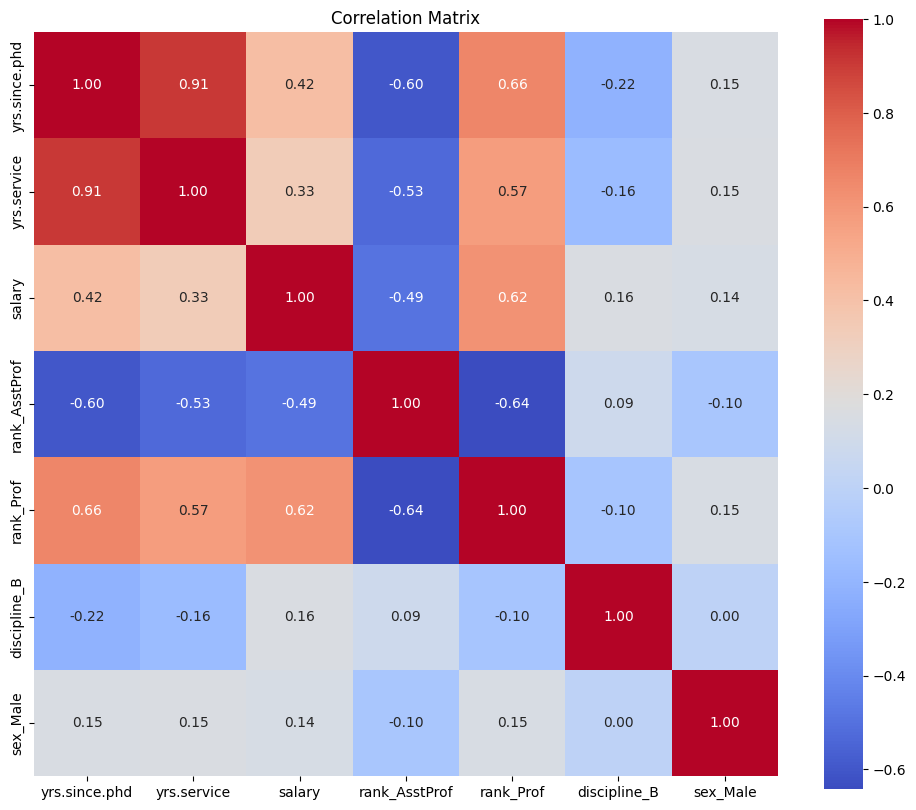

In [ ]:
# 4. Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

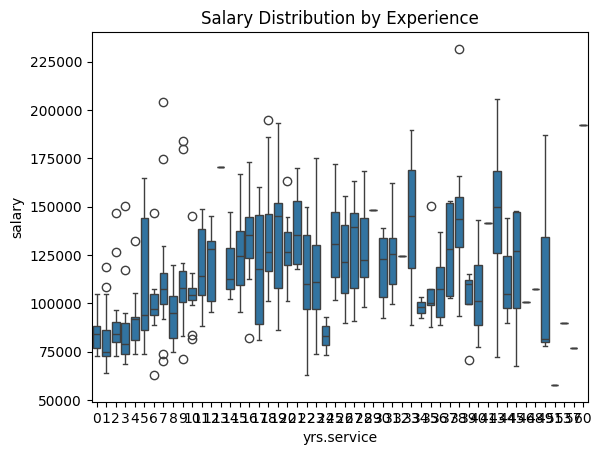

In [ ]:
# 5. Additional Visualization
sns.boxplot(x='yrs.service', y=target_variable, data=data)
plt.title("Salary Distribution by Experience")
plt.show()

# Interpretation:
# The box plot shows the distribution of salaries across different levels of experience. Higher experience levels
# tend to have higher salary medians, but there are also potential outliers
#Salaries tend to increase with more years of service, as the median salary generally rises over time.

In [ ]:
# 2. Multilinear Regression Model
# 1. Preprocessing
X = data.drop(columns=[target_variable])
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrames to ensure index alignment
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

## 2. Model Creation
X_train_scaled_df = sm.add_constant(X_train_scaled_df)  # Add intercept for statsmodels
model = sm.OLS(y_train, X_train_scaled_df).fit()

In [ ]:
# 3. Model Summary
print("\nModel Summary:")
print(model.summary())

# 4. Make Predictions
X_test_scaled_df = sm.add_constant(X_test_scaled_df)  # Add intercept for test data
y_pred = model.predict(X_test_scaled_df)

# 5. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 6. Fine-Tuning
# Identify statistically significant features
significant_features = model.pvalues[model.pvalues < 0.05].index
print(f"\nSignificant Features: {significant_features}")

# Create a new model with significant features
X_train_significant = X_train_scaled_df[significant_features]
X_test_significant = X_test_scaled_df[significant_features]

new_model = sm.OLS(y_train, X_train_significant).fit()
print("\nFine-Tuned Model Summary:")
print(new_model.summary())

# New Predictions and Evaluation
y_pred_new = new_model.predict(X_test_significant)
mae_new = mean_absolute_error(y_test, y_pred_new)
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))
print(f"\nFine-Tuned Model MAE: {mae_new}")
print(f"Fine-Tuned Model RMSE: {rmse_new}")





Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     50.04
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           7.69e-43
Time:                        14:02:48   Log-Likelihood:                -3619.2
No. Observations:                 317   AIC:                             7252.
Df Residuals:                     310   BIC:                             7279.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.141e+05   124

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                        test_size = 0.2,
                                                        random_state = 1502)

In [ ]:
# Initialize the model
tree_model = DecisionTreeRegressor (random_state=42)

# Train the model
tree_model. fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Get feature importance
feature_importance = tree_model. feature_importances_

In [ ]:
# Create a DataFrame to display feature importance alongside feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance # Changed 'feature_importances' to 'feature_importance'
}).sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
3      rank_Prof    0.422131
0  yrs.since.phd    0.242765
1    yrs.service    0.224974
4   discipline_B    0.074614
5       sex_Male    0.018906
2  rank_AsstProf    0.016611


In [ ]:
# Make predictions on the test set for tree regression model
predictions_tree = tree_model.predict(X_test2)


In [ ]:
#Result for tree regression
results_tree = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int) # Call astype as a method of predictions_tree
})
results_tree

,Actual,Predicted
0,205500,143940
1,132261,165000
2,150680,135200
3,106300,105350
4,118971,170000
...,...,...
75,162150,162221
76,115435,114330
77,84240,88825
78,136000,126300


In [ ]:
# Calculate performance metrics for tree regression
print ("MAE:", round(mean_absolute_error(y_test2, predictions_tree), 0))
print ("RMSE:", round(np.sqrt(mean_squared_error(y_test2, predictions_tree)), 0))


MAE: 20950.0
RMSE: 29733.0


In [ ]:
print(data.columns)  # Replace 'df' with 'data'
df2 = data.drop(columns=[col for col in ['discipline_B','sex_Male', 'rank_AssProf'] if col in data.columns])  # Replace 'df' with 'data'
print(df2.columns)

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof',
       'discipline_B', 'sex_Male'],
      dtype='object')
Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AsstProf', 'rank_Prof'], dtype='object')


In [ ]:
X2 = df2.drop(columns=['salary'])

In [ ]:
y = df2['salary']



In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y,
                                                        test_size = 0.2,
                                                        random_state = 1502)
tree_model = DecisionTreeRegressor (random_state=42)

# Train the model
tree_model. fit(X_train2, y_train2)
# Make predictions on the test set for tree regression model
predictions_tree = tree_model. predict(X_test2)

#Result for tree regression
results_tree2 = pd. DataFrame ({
    'Actual': Y_test2.values.astype(int), # Changed _test2 to Y_test2
    'Predicted': predictions_tree.astype (int)
})
results_tree2


,Actual,Predicted
0,205500,143940
1,132261,96545
2,150680,151421
3,106300,73300
4,118971,170000
...,...,...
75,162150,126000
76,115435,107986
77,84240,88825
78,136000,139928


In [ ]:
print ("MAE:", round (mean_absolute_error (y_test2, predictions_tree), 0))
print ("RMSE:", round (np.sqrt (mean_squared_error(y_test2, predictions_tree)), 0))


MAE: 20912.0
RMSE: 29919.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor



In [ ]:
from math import sqrt

In [ ]:
X = data.drop(columns=['salary'])  # Replace 'df' with 'data'
y = data['salary']  # Replace 'df' with 'data'
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model. fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model. predict(X_test)

In [ ]:
# ipython-input-42-df490d47548b
# Replace 'df' with 'data'
X = data.drop(columns=['salary'])
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Changed Y_test to y_test

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print (mae)
print (rmse)

17258.789347767855
23438.488061209762
